In [ ]:
import numpy as np
import glob
from matplotlib import pyplot as plt
import librosa.display
import os
import random
from Pipeline.data_generation import DataGenerator
from Pipeline.preprocess import Loader, BandpassFilter, Normalizer, SpectrogramExtractor, FrequencySelector

In [4]:
sample_rate = 44100
duration = 0.05
MIN_FREQ = 500
MAX_FREQ = 14000

NFFT = 128
FRAME_LENGTH = 128
HOP_LENGTH = 64

In [5]:
loader = Loader(sample_rate=sample_rate)
bandpass = BandpassFilter(200, 20000, sample_rate, order=2)
normalizer = Normalizer(mode='mean_std')
spectrogram_extractor = SpectrogramExtractor(NFFT, FRAME_LENGTH, HOP_LENGTH, mode="spectrogram")
selector = FrequencySelector(MIN_FREQ, MAX_FREQ)

In [90]:
wood_sound = loader.load('..\Dataset\Final dataset\Generation\Pulses\Background\TASCAM_386.wav')
insect_sound = loader.load('..\Dataset\Final dataset\Generation\Pulses\Disturbance\interference_pulse_1.wav')

In [148]:
gen = DataGenerator(
    wood_sound=wood_sound,
    insect_sound=insect_sound,
    detection_label=1,
    class_label='bark',
    sample_rate=sample_rate,
    pulse_num_range=(1, 8),
    inter_pulse_duration=(0.005, 0.015),
)

In [173]:
n_samples = int(duration * sample_rate)

data = gen.generate_background(n_samples)
data = gen.insert_pulses(data.copy())
data = gen.randomly_augment_data(data, pulse=False)

In [174]:
data = bandpass.filter(data)

In [175]:
spectrogram = spectrogram_extractor.extract(data, sample_rate, log=True).astype(np.float32)
spectrogram = normalizer.normalize(spectrogram)
spectrogram, _ = selector.select(spectrogram, NFFT, sample_rate)

(-0.02, 0.02)

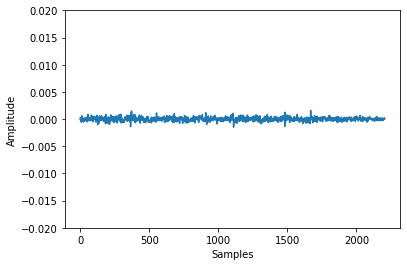

In [177]:
plt.plot(data_silence)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.ylim(-0.02, 0.02)

(-0.02, 0.02)

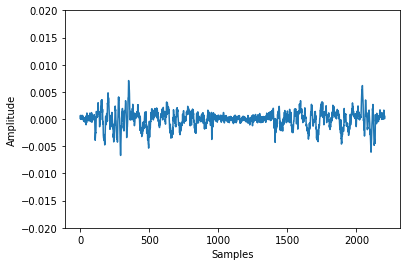

In [137]:
plt.plot(data_interference)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.ylim(-0.02, 0.02)

(-0.02, 0.02)

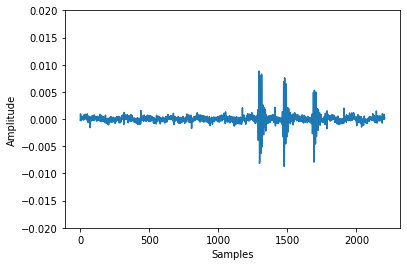

In [76]:
plt.plot(data_small)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.ylim(-0.02, 0.02)

(-0.02, 0.02)

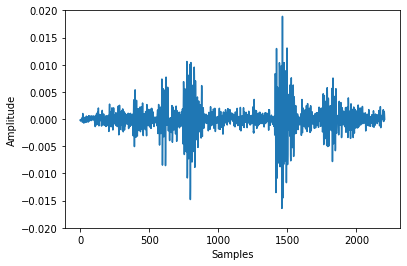

In [55]:
plt.plot(data_big)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.ylim(-0.02, 0.02)

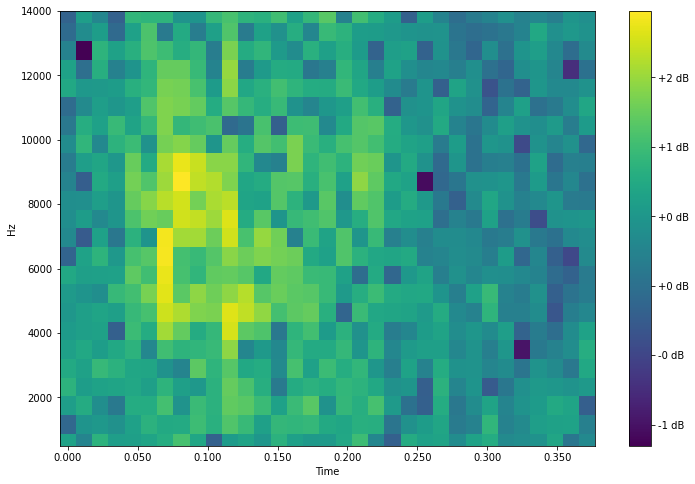

In [53]:
fig, ax = plt.subplots(figsize=(12, 8))
img = librosa.display.specshow(spectrogram, x_axis='time', y_axis='linear', sr=sample_rate, ax=ax, cmap='viridis')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.ylim(MIN_FREQ, MAX_FREQ)
plt.show()

In [21]:
gen = DataGenerator(
    wood_sound=wood_sound,
    insect_sound=insect_sound,
    detection_label=1,  # 0
    class_label='longhorn',
    sample_rate=sample_rate,
    pulse_num_range=(1, 8),  # (1, 5)
    inter_pulse_duration=(0.003, 0.015),  # (0.005, 0.015)
)

In [ ]:
# Generate data with pulses
count = 0
n_files = 7
#wood_dir = '../../Dataset/audio_pulses/background/'
#insect_dir = '../../Dataset/audio_pulses/longhorn/*.wav'

wood_dir = 'C:/Users\loren\Desktop\Dataset\Generation\Pulses\Background/'
insect_dir = 'C:/Users\loren\Desktop\Dataset\Generation\Pulses\Longhorn/*.wav'

#wood_sound = loader.load('../Dataset/NAU dataset/TASCAM/lab/Ponderosa/44.1 KHz/clean log/TASCAM_100.wav')
#gen.set_wood_sound(wood_sound)

for audio_file in glob.glob(f'{insect_dir}', recursive=True):
    #randomly select a wood sound from the directory of background
    random_file = random.choice(os.listdir(wood_dir))
    wood_sound = loader.load(os.path.join(wood_dir, random_file))
    gen.set_wood_sound(wood_sound)

    # for each insect sound, generate n_files synthetic data files
    insect_sound = loader.load(audio_file)
    gen.set_insect_sound(insect_sound)

    gen.generate_data(
        n_files=n_files,
        duration=0.05,
        save_path='C:/Users\loren\Desktop\Dataset\Generation\Generated dataset\Big mandibles/',
        save_num=count,
        mode='augment'
    )
    count += n_files

In [15]:
# Generate background data (no pulses)
count = 600
n_files = 10
wood_dir = 'C:/Users\loren\Desktop\Dataset\Generation\Pulses\Background/*.wav'

for audio_file in glob.glob(f'{wood_dir}', recursive=True):
    #randomly select a wood sound from the directory of background
    wood_sound = loader.load(audio_file)
    gen.set_wood_sound(wood_sound)

    gen.generate_data(
        n_files=n_files,
        duration=0.05,
        save_path='C:/Users\loren\Desktop\Dataset\Generation\Generated dataset\Background/',
        save_num=count,
        mode='augment'
    )
    count += n_files

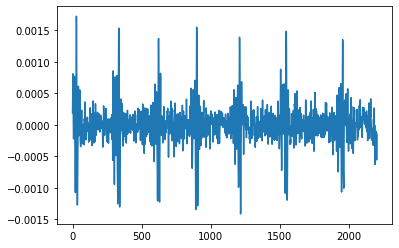

In [20]:
path = 'C:/Users\loren\Desktop\Dataset\Generation\Generated dataset\Small mandibles/bark_0.wav'
y = loader.load(path)
y = bandpass.filter(y)
plt.plot(y)

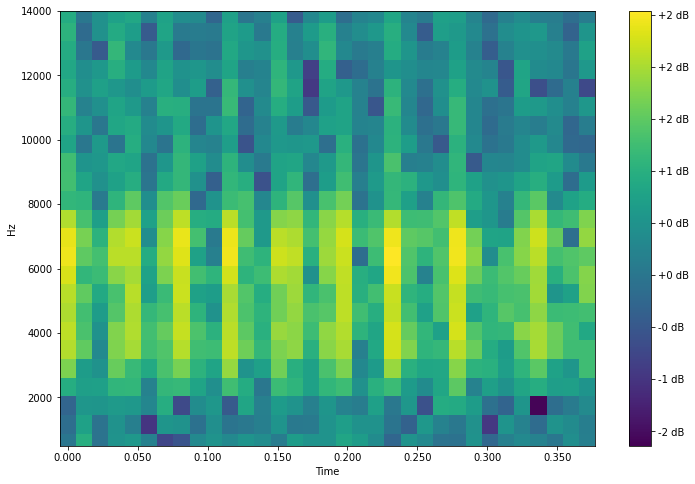

In [77]:
spectrogram = spectrogram_extractor.extract(y, sample_rate, log=True).astype(np.float32)
spectrogram = normalizer.normalize(spectrogram)
spectrogram, _ = selector.select(spectrogram, NFFT, sample_rate)
fig, ax = plt.subplots(figsize=(12, 8))
img = librosa.display.specshow(spectrogram, x_axis='time', y_axis='linear', sr=sample_rate, ax=ax, cmap='viridis')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.ylim(MIN_FREQ, MAX_FREQ)
plt.show()

In [26]:
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

get_truncated_normal(mean=0.009, sd=0.012, low=0.003, upp=0.015).rvs()

0.00480577351823351